In [1]:


import plantsKin as pk
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import imp
import time
import baseToolbox as bt
imp.reload(pk)
imp.reload(bt)

<module 'baseToolbox' from 'C:\\Users\\renaud\\Dropbox\\Python\\Plants-Kinematics\\src\\baseToolbox.py'>

In [11]:
plant = []
plant = pk.Plant(x0 = [0,0,0],theta0 = 1.5*pi/2,N = 1000,dt=.01,growth = 'Apical',growthRate=1)

In [12]:
#plant.addInteractions(name = 'Proprioception' ,intensity=-10)

In [13]:
plant.addInteractions(name = 'ApicalTropism' ,intensity=-10,direction = 0)

In [14]:
plant.skeleton[0].growth

{'name': 'Apical', 'growthZone': 1, 'growthRate': 1}

C:\Users\renaud\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


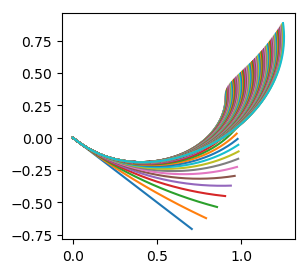

In [15]:

fig = plt.figure(figsize=(3, 3), dpi=100)
for k in range(0,100):
    ax = fig.add_subplot(111)
    ax.plot(plant.x[:,0],plant.x[:,2], antialiased=True)
    t0=time.time()
    plant.update()
    t1=time.time()
    #print(-1/(t0-t1))
    t0=t1


C:\Users\renaud\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


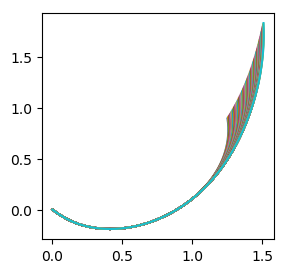

In [16]:

fig = plt.figure(figsize=(3, 3), dpi=100)
for k in range(0,100):
    ax = fig.add_subplot(111)
    ax.plot(plant.x[:,0],plant.x[:,2])
    t0=time.time()
    plant.update()
    t1=time.time()
    #print(-1/(t0-t1))
    t0=t1

In [17]:
%lprun -f pk.skeletonElements.update plant.update()

UsageError: Line magic function `%lprun` not found.


In [ ]:
%lprun -f pk.skeletonElements.update roots.update()

In [ ]:
%lprun -f plant.updateSpatialPosition plant.update()

In [3]:
imp.reload(pk)
imp.reload(bt)
roots = pk.Roots(20,.5,theta0 =0)

roots.addCollectiveInteraction(name ='Apical')
#roots.addInteractions(name = 'Tropism' ,intensity=-1,direction = 0)

In [19]:
roots.update()
print('distance  : '+str(roots.distanceTip))

distance  : [[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
  9.  9.5]
 [0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.
  8.5 9. ]
 [1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5
  8.  8.5]
 [1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.
  7.5 8. ]
 [2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5
  7.  7.5]
 [2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.
  6.5 7. ]
 [3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5
  6.  6.5]
 [3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.
  5.5 6. ]
 [4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5
  5.  5.5]
 [4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.
  4.5 5. ]
 [5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  1.5 2.  2.5 3.  3.5
  4.  4.5]
 [5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0.  0.5 1.  

In [ ]:
import matplotlib.animation as animation


#roots.addCollectiveInteraction(name ='Apical')
#roots.addInteractions(name = 'ApicalTropism' ,intensity=-10,direction = -pi/3)
fig = plt.figure(figsize=(10.80, 10.80), dpi=100)
fig.tight_layout()

#ig.patch.set_visible(False)

ax = fig.add_subplot(111)
ax.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
lines = []
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) 
for root in roots.roots:
    lines.append(ax.plot(root.x[:,0],root.x[:,2], antialiased=True, color='black')[0])
ax.set_xlim(0,10.1)
ax.set_ylim(-0.1,1.1)
    
def init():
    for line in lines:
        line.set_data([],[])
    return lines


def animate(i):
    
    for k in range(0,len(lines)):
        
        lines[k].set_data(roots.roots[k].x[:,0],roots.roots[k].x[:,2])

    t0=time.time()
    roots.update()
    t1=time.time()
    ax.set_xlim(0,10.1)
    ax.set_ylim(-0.1,1.1)
    #print(-1/(t0-t1))
    t0=t1
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1200, interval=20, blit=True)
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [18]:
ln=ax.plot(root.x[:,0],root.x[:,2])

In [37]:
len(roots.roots)

20

In [23]:
roots.addCollectiveInteraction(name ='Apical')

In [24]:
roots.flatten()
roots.tipDistance()
roots.collectiveComputation()
print('xTip  : '+str(roots.xTip))
print('distance  : '+str(roots.distanceTip))
print('theta     : '+str(roots.alphaTip))
print('direction : '+str(roots.directionCollective))
print('intensity : '+str(roots.intensityCollective))

xTip  : [[0.0558273  0.         0.99691604]
 [0.5638951  0.         0.99626896]
 [1.05463363 0.         0.99700433]
 [1.55526652 0.         0.99695776]
 [2.01655494 0.         0.99881699]
 [2.5123568  0.         0.99889805]
 [3.01230079 0.         0.99889897]
 [3.51231196 0.         0.99889878]
 [4.00815809 0.         0.99895556]
 [4.50815782 0.         0.99895557]
 [4.99184218 0.         0.99895557]
 [5.49184081 0.         0.99895555]
 [5.98768658 0.         0.99889876]
 [6.48770139 0.         0.998899  ]
 [6.98764758 0.         0.99889812]
 [7.48761062 0.         0.99889751]
 [7.94473231 0.         0.99695767]
 [8.44491516 0.         0.99697118]
 [8.93609582 0.         0.99626818]
 [9.4403149  0.         0.99661758]]
distance  : [[0.         0.5080682  0.99880633 1.49943922 1.96072856 2.45653029
  2.95647415 3.45648523 3.95233131 4.45233098 4.9360153  5.43601389
  5.93185961 6.43187439 6.93182055 7.43178358 7.88890501 8.38908786
  8.88026854 9.3844876 ]
 [0.5080682  0.         0.4907

In [25]:
interactionTip = roots.distanceTip
interactionTip[(roots.distanceTip>roots.collectiveInteractions[0]['repulsionZone'])) & (roots.distanceTip<roots.collectiveInteractions[0]['attractionZone'])]

SyntaxError: invalid syntax (<ipython-input-25-90846d84b1b2>, line 2)

In [ ]:
pi/2

In [ ]:
bt.distPointToPoint(np.array([[0.66779898,0.,0.57235274],[0.83220102,0.,0.57235274]]),0)

In [ ]:
from decimal import *
getcontext()

In [ ]:
import sys
sys.float_info

In [ ]:
roots = pk.Roots(35,.1,theta0 =0,growth='Apical')
roots.addCollectiveInteraction(name ='Apical')
for j in range(0,len(roots.roots)):
    bt.writeCsvRoots(roots.roots[j].x,'try'+str(j).zfill(3)+'.csv','./',writeMode = 0)

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)
for k in range(0,100):
    for root in roots.roots:
        ax.plot(root.x[:,0],root.x[:,2])
    roots.update()
    for j in range(0,len(roots.roots)):
        bt.writeCsvRoots(roots.roots[j].x,'try'+str(j).zfill(3)+'.csv','./',writeMode = 1)

In [ ]:
bt.writeCsvRoots(roots.roots[0].x,'try.csv','./',writeMode = 1)